# Making a classification model 

In Level 4, you were introduced to Logistic Regression as a classification model and were shown how to train and test a model, and evaluate the performance of the model. 

In this module, we will be solving multiple business problems using the "London House Price Data". In this notebook, we will revisit some panda basics that you already know from level 4 and train a Decision Tree model! 

## Outline <a name="top"></a>
1. [London House Price Demo Dataset description](#dataintro)
2. [Cleaning Data](#cleaning)
3. [Decision Tree](#decisiontree)
4. [Activity](#activity)

### London House Price Demo Dataset description <a name="dataintro"></a>
The dataset contains information about residential properties in London. It is a web scraped data from rightmove with some synthetic data that contains a wide range of features that describe various aspects of the properties.
It contains approximately 1400 records, each representing a unique property, and contains a total of 24 variables/ features. These variables cover a variety of aspects related to the properties, including numerical, categorical, and textual information.


In [1]:
### loading packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score

from sklearn.tree import export_graphviz
from IPython.display import Image 

In [2]:
## Read in comma separated file 

df = pd.read_csv('./london_house_price_data.csv',index_col = [0])

In [3]:
## Check variables information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468 entries, 0 to 1467
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   link                  1468 non-null   object 
 1   saleprice             1379 non-null   float64
 2   address               1379 non-null   object 
 3   description           1468 non-null   object 
 4   added_date            1371 non-null   object 
 5   agent                 1468 non-null   object 
 6   property_type         1468 non-null   object 
 7   bedrooms              1468 non-null   int64  
 8   bathrooms             1468 non-null   int64  
 9   distance_to_station   1379 non-null   object 
 10  tenure                1254 non-null   object 
 11  leasehold_years_left  86 non-null     float64
 12  postcode              1021 non-null   object 
 13  borough               1021 non-null   object 
 14  crime_rate            1021 non-null   float64
 15  total_area           

Column leasehold_years_left has a large number of missing value.

In [4]:
df.head()

,link,saleprice,address,description,added_date,agent,property_type,bedrooms,bathrooms,distance_to_station,...,crime_rate,total_area,year_built,property_condition,amenities_rating,garden,balcony,fuel_type,sold_date,sold_under_90days
0,https://www.rightmove.co.uk/properties/101652539,500000.0,"Cranwich Road, Stoke Newington, N16",A bright and airy three bedroom flat split lev...,2021-01-04,"Oakwood, Stoke Newington",Flat,3,2,0.2 miles,...,108.0,1646.106785,1978,7.0,7.0,False,False,electric,2021-02-21,True
1,https://www.rightmove.co.uk/properties/88140277,340000.0,"Harton Lodge, Harton Street, London, SE8",Enviably located two bedroom flat within a sec...,2020-11-25,"Keatons, Deptford",Flat,2,1,0.1 miles,...,90.0,883.519097,1961,7.0,5.0,False,False,electric,2020-11-26,True
2,https://www.rightmove.co.uk/properties/100977803,500000.0,"Cambridge Gardens, W10",A simply stunning one bedroom flat has been fi...,2020-12-10,"Douglas & Gordon, Notting Hill",Flat,1,1,0.2 miles,...,298.0,1397.047369,1984,8.0,9.0,False,True,electric,2021-04-19,False
3,https://www.rightmove.co.uk/properties/100775885,695000.0,"Coniston Road, N10",This lovely ground floor garden flat combines ...,2020-12-04,"Prickett & Ellis, Muswell Hill",Flat,2,1,1.0 miles,...,70.0,1280.604047,2008,7.0,6.0,False,False,gas,2020-12-20,True
4,https://www.rightmove.co.uk/properties/77872105,770000.0,"Clapham Road, London, SW9",**Viewings Available**A stunning and impressiv...,2020-07-09,"Hamptons Sales, London Residential Development",Flat,3,1,0.1 miles,...,103.0,1373.074643,1980,5.0,4.0,False,True,electric,2020-07-12,True


## Cleaning the data <a name="cleaning"></a> 

**Removing Columns**

We can remove columns that do not contribute to our analysis. For example: 
- link
- address 
- description
- added_date, sold_date
- agent
- postcode
- borough

We don't need these for this analysis and it will be easier to drop it now.

**Column Names**

The columns have pretty informaitve name. Just bear in mind it's always good practice to have concise column name if possible. Here, we don't really have to change any names.

**Numerical data clean**

We notice the distance_to_station column has the word "miles" which then makes it a non-numerical variable. Remove the word miles.

**Missing Values**

There appears to be some missing data. In this notebook, we will drop all of the rows that contain a missing value - a complete case analysis. By doing so, we are assuming "Missing Completely at random (MCAR)" can make a large difference in outcome. In this dataset, we will assume dropping the missing values will be completely fine. However, filling in the missing values with a multiple imputation method is advised in case you encounter a dataset with more missing values at a later date. We will be discussing missing values in Workshop 4.  


**Target Variable** 

The Target variable used today is in the last column. It is a binary variable with True for property sold under 90 days and False for property sold after 90 days since listed on the website. We want to map these to value 1 (True) and 0 (False).  


**Splitting Data**

For a machine learning analysis, you need to split your data into two components - train and test. You train your model on the training data, and see how accurate it is on your test data. You cannot use the test dataset to make any decisions about choosing a model or changing the parameters of the model. If you do, then you have turned your test set into training data. The idea is to see how well your model performs on data that it hasn't seen before.


**Final Datasets**

This cleaning will end up with 2 datasets
- data = the original data cleaned with missing values dropped
- full_data = the original data cleaned with missing values dropped, upsampling to have class balance

Repeating the analyses on two different versions of the data set is called sensitivity analysis, since we expect the performance of the prediction to be similar in the two datasets and possibly improve with the "full_data" version.


[(Back to the top)](#top)

In [5]:
## Removing columns 
byebye_col = ['link','address','description','added_date','sold_date','agent','postcode', 'borough']
df = df.drop(columns = byebye_col)

df

,saleprice,property_type,bedrooms,bathrooms,distance_to_station,tenure,leasehold_years_left,crime_rate,total_area,year_built,property_condition,amenities_rating,garden,balcony,fuel_type,sold_under_90days
0,500000.0,Flat,3,2,0.2 miles,NaN,NaN,108.0,1646.106785,1978,7.0,7.0,False,False,electric,True
1,340000.0,Flat,2,1,0.1 miles,Leasehold,NaN,90.0,883.519097,1961,7.0,5.0,False,False,electric,True
2,500000.0,Flat,1,1,0.2 miles,Leasehold,NaN,298.0,1397.047369,1984,8.0,9.0,False,True,electric,False
3,695000.0,Flat,2,1,1.0 miles,NaN,NaN,70.0,1280.604047,2008,7.0,6.0,False,False,gas,True
4,770000.0,Flat,3,1,0.1 miles,Leasehold,NaN,103.0,1373.074643,1980,5.0,4.0,False,True,electric,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,NaN,Flat,3,3,NaN,NaN,NaN,NaN,NaN,2010,NaN,NaN,False,True,NaN,NaN
1464,450000.0,Flat,1,1,0.4 miles,Share of freehold,NaN,105.0,849.142138,1960,7.0,5.0,False,True,electric,True
1465,940000.0,Flat,2,2,0.7 miles,Leasehold,999.0,108.0,1743.483704,1945,7.0,7.0,False,True,electric,True
1466,430000.0,Flat,1,2,0.2 miles,Leasehold,NaN,298.0,1094.350290,1995,5.0,4.0,False,True,electric,True


In [6]:
# Remove word "miles" in column "distance_to_station"
df['distance_to_station'] = df['distance_to_station'].str.replace(' miles', '')
df.distance_to_station

0       0.2
1       0.1
2       0.2
3       1.0
4       0.1
       ... 
1463    NaN
1464    0.4
1465    0.7
1466    0.2
1467    0.4
Name: distance_to_station, Length: 1468, dtype: object

In [7]:
## Missing values 
### Columns 

print(df.isnull().sum()) # Column 'leasehold_years_left' has a large number of missing values, drop that column first before dropping NAs

df = df.drop('leasehold_years_left', axis = 1)
df.dropna(inplace=True)
print(df.shape)


saleprice                 89
property_type              0
bedrooms                   0
bathrooms                  0
distance_to_station       89
tenure                   214
leasehold_years_left    1382
crime_rate               447
total_area                89
year_built                 0
property_condition        89
amenities_rating          89
garden                     0
balcony                    0
fuel_type                 89
sold_under_90days         89
dtype: int64
(938, 15)


In [8]:
## Convert True and False to 1 and 0
df.iloc[:,-1] = df.iloc[:,-1].astype(int)
df.head()

,saleprice,property_type,bedrooms,bathrooms,distance_to_station,tenure,crime_rate,total_area,year_built,property_condition,amenities_rating,garden,balcony,fuel_type,sold_under_90days
1,340000.0,Flat,2,1,0.1,Leasehold,90.0,883.519097,1961,7.0,5.0,False,False,electric,1
2,500000.0,Flat,1,1,0.2,Leasehold,298.0,1397.047369,1984,8.0,9.0,False,True,electric,0
4,770000.0,Flat,3,1,0.1,Leasehold,103.0,1373.074643,1980,5.0,4.0,False,True,electric,1
5,590000.0,Flat,1,1,0.3,Leasehold,85.0,1337.027438,1930,7.0,7.0,False,True,electric,1
8,550000.0,House,3,2,0.7,Freehold,90.0,1579.394413,2000,7.0,6.0,True,False,electric,1


## Decision Trees <a name="decisiontree"></a>

Decision trees use a tree structure to display algorithms that only contain control statements - or if/else statements. At each node, whether a condition is met or failed sends the user down one of two paths. This continues until the terminal state is reached. 

<div>
<img src="WS_DT.png" width="500"/>
</div>

These diagrams are popular as it can be easily interpreted, with the below diagram [(source)](https://www.datacamp.com/tutorial/decision-tree-classification-python) showing a simple example of a whether a person is at-risk for a heart attack.

<div>
<img src="heart_attack_risk.png" width="500"/>
</div>


In ML, we train the model to make decisions for us. The algorithm selects the predictor that performs the optimal split at each node of the tree (technical term is recursive partioning). Decision trees can be either a classification or regression algorithm - this notebook shows classification. In a classification problem, the algorithm looks at the mixture of positive and negative outcomes on each side of the split. But how does it decide which node to explore first?

### Gini Impurity

In a decision tree, the process of deciding which node to explore first is based on the concept of information gain or another similar metric like Gini index. The node that results in the highest information gain (or lowest impurity) is chosen as the starting point.

- **Gini Index** : Gini index measures the impurity or disorder of a node, meaning the probability that a randomly chosen element from a set of data would be **incorrectly** labeled or misclassified. The feature and threshold that minimize the Gini index are selected as the splitting criteria for the current node.

\begin{equation*}
Gini Index = 1 - \sum_{i = 1}^{n}p_{i}^{^{2}}
\end{equation*}

- **Information Gain** : Information gain measures the difference in impurity before and after splitting the data based on a particular feature and threshold. The feature and threshold that result in the highest information gain are chosen as the splitting criteria for the current node.


Decision trees find which predictor will result in the lowest purity metric at each node split to construct the tree structure. *Note: This makes it a greedy algorithm - since it determines the best split at each node rather than optimizing the final prediction/purity score.*

The goal is to start at the root node and continue to split while purity is being gained - hopefully finding the optimal model structure. However, this drive to split can lead the algorithm to get overly complex and overfit to the training data. To combat this, you can add several restrictions to the model:
- **tree depth** is how many levels the model has. Having more levels can improve accuracy but lead to overfitting.
- **minimum number of samples** controls how many samples can be in a node. If after a proposed split, a resulting node has less than n - the split is rejected. Having a lower minimum number can increase accuracy but lead to overfitting
- **minimum impurity split** controls whether a node will be split. If the impurity is above a threshold, a node will be split. Low values will generate higher accuracy at the cost of potential overfitting.

sklearn website for all parameters https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

[(Back to the top)](#top)

## Building the model 

In [9]:
# Extract the predictors and target 

X = df.drop(columns = ['sold_under_90days'])
y = df['sold_under_90days']


In [10]:
# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=456)

In [11]:
# Train and test the model 
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

accuracy_score(predictions, y_test)

ValueError: could not convert string to float: 'House'

Note: There is an error : "could not convert string to float" 
This is telling us that we have some categorical variables or non-numeric values that cannot be directly used by the Decision Tree algorithm. We need to convert them into numerical representations before training the model. 

**One-hot Encoding**

In [12]:
## One-hot encoding on categorical columsn before training the model 
X_train_encoded = pd.get_dummies(X_train, columns=['property_type','tenure','fuel_type'])
X_test_encoded = pd.get_dummies(X_test, columns=['property_type', 'tenure','fuel_type'])

model = tree.DecisionTreeClassifier()
model.fit(X_train_encoded, y_train)
predictions = model.predict(X_test_encoded)

from sklearn.metrics import accuracy_score
accuracy_score(predictions, y_test)

0.851063829787234

It seems like we have a pretty high accuracy score. Let's check the **confusion matrix** and see what additional information we can gain. 

### Confusion matrix
​
There are other ways to evaluate a classification model than looking at its accuracy, we can also investigate where it is making mistakes. To explain this, let's visualise what the first model is doing.

In [13]:
# Now building the matrix: 
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
pd.DataFrame(confusion_matrix(y_test,predictions))

,0,1
0,32,20
1,8,128


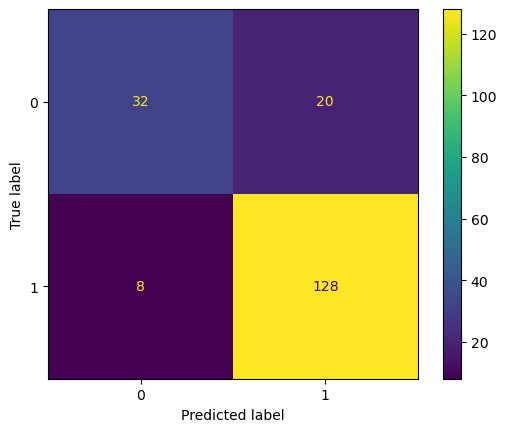

In [14]:
# Or something more visually appealing?

cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm).plot();


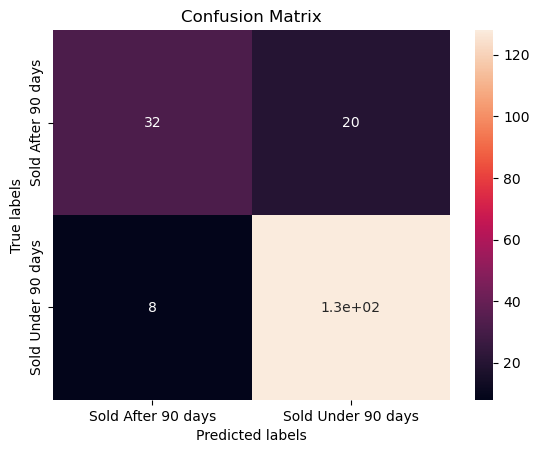

In [17]:
## Accuracy

cm = confusion_matrix(y_test, y_pred=predictions)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Sold After 90 days', 'Sold Under 90 days']) 
ax.yaxis.set_ticklabels(['Sold After 90 days', 'Sold Under 90 days'])

plt.show()


We can also plot the tree that we built :

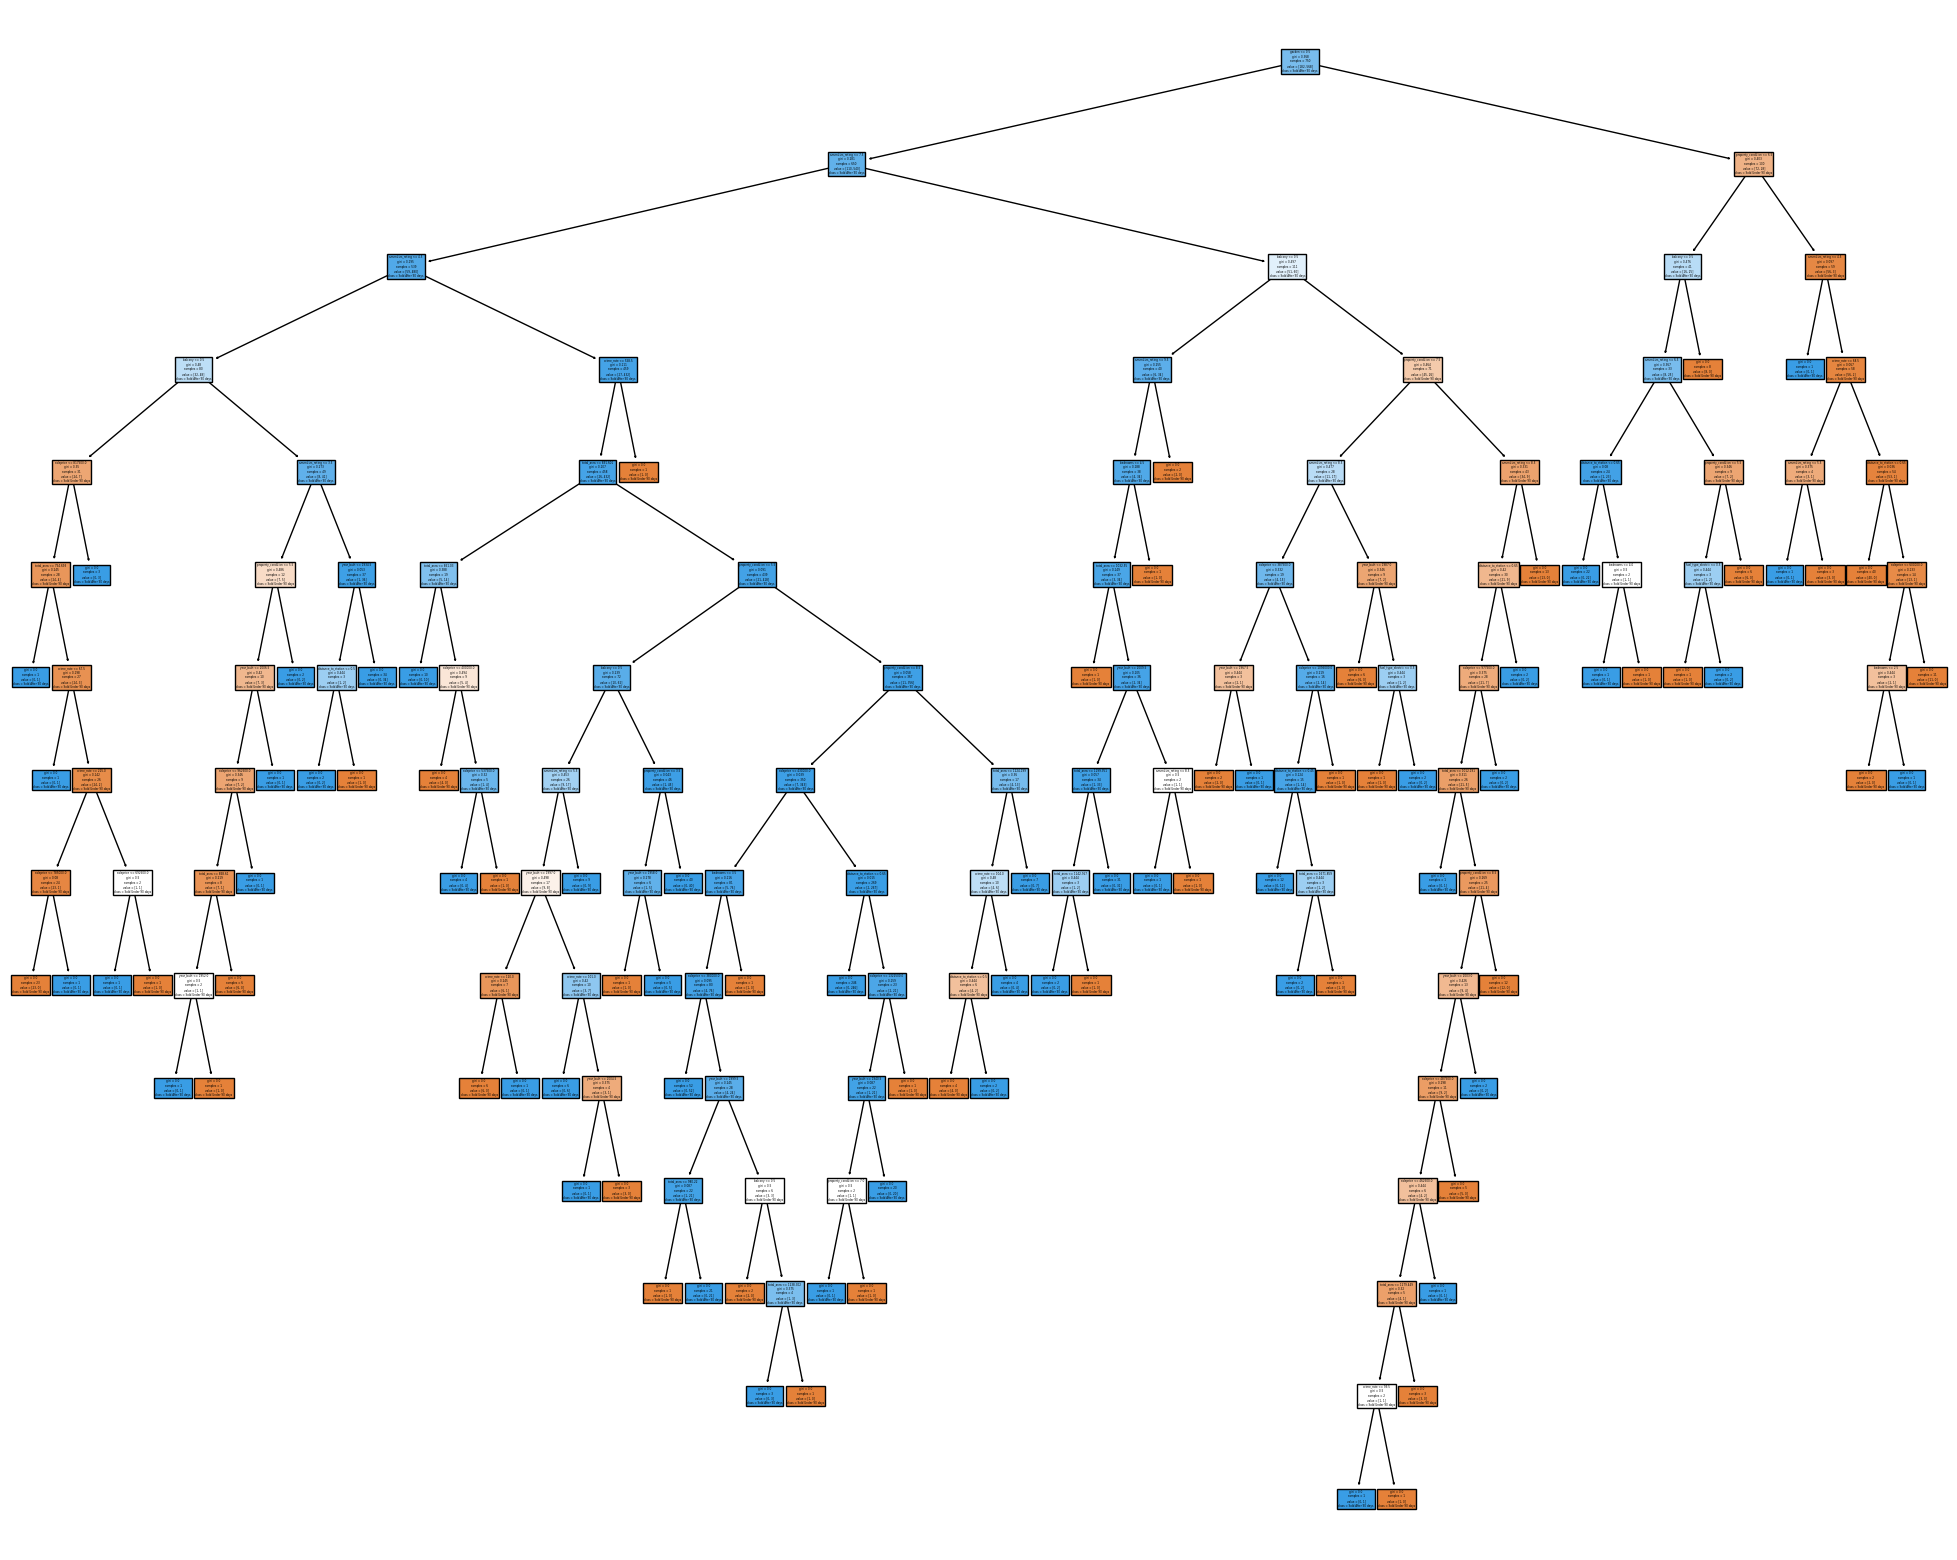

In [16]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=X_train_encoded.columns,  
                   class_names=['Sold Under 90 days','Sold After 90 days'], ## 0 = sold after 90 days 1 = sold under 90 days
                   filled=True)

We have completed a decision tree model building and evaluated the performance, what do you think needs to be improved? 

<details>
<summary>Click to see the Pros and Cons of decision tree</summary>

**Pros and Cons of a decision tree**

Pros
- non-linear
- can handle numeric and categorical data
- does not need the data to be scaled -- aids in ease of interpretation
- non-parametric method
- can handle multiple outcome variables
- robust (performs well if assumptions are violated)

Cons
- prone to overfitting
- can be unstable (small variations in the data may result in a completely different tree stucture)
- can find a suboptimal solution due to the greedy nature of the algorithm
- often biased towards the majority class. Data rebalancing is often used in conjuncture with the algorithm.
- often less accurate than comparable methods
- information gain is [biased towards categories with more levels](https://www.researchgate.net/publication/221079908_Bias_of_Importance_Measures_for_Multi-valued_Attributes_and_Solutions)
- large trees can be difficult to interpret

</details>

## Activity - your turn! <a name="activity"></a>

Now it's your turn to build a Decision Tree model using a Telecom Churn dataset. 

1. [Revisit Cleaning Data](#cleaning)
2. [Revisit Decision Tree](#decisiontree)

Your task is to explore this synthetic telecom churn dataset to predict behaviour of customers to retain churn. It is a simple dataset that allows you to explore the newly learnt ML skills.
### Churn dataset description 
The dataset contains information about telecommunications customer churn behaviour. It is a fictional telco company that provided mobile phone and internet services and the data is synthetic.   
It contains approximately 4000 records, each representing a customer, and contains a total of 8 variables/ features. These variables cover a variety of aspects related to the customer behaviour, demographic and contract types.

For this task, can you preduct whether customers at a fictional telecom company will exit their subscription, churn or not?